In [1]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.colors
import numpy as np
import os
%matplotlib inline

In [2]:
def get_lengths(gtf):
    df = pd.read_csv(gtf, sep="\t", header=None,names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])
    return list([i for i in df["end"] - df["start"] if not i == 0])

In [3]:
gtfs = ['phased-vcf/' + i for i in os.listdir('phased-vcf') if i.endswith('.gtf')]
names = [int(i.split('/')[-1].split('-')[1].split('_')[0]) for i in gtfs]
blocks = [get_lengths(g) for g in gtfs]
res = {n: b for n, b in zip(names, blocks)}

In [9]:
sorter = {k: np.percentile(v, 99)  for k, v in res.items()}
order = [i for i,j in sorted(sorter.items(), key=lambda kv: kv[1])]
chosen_sets = [100,200,500,1000,2000,3000,5000, 7500, 10000, 20000, 30000, 40000, 50000,75000,100000,200000,500000]

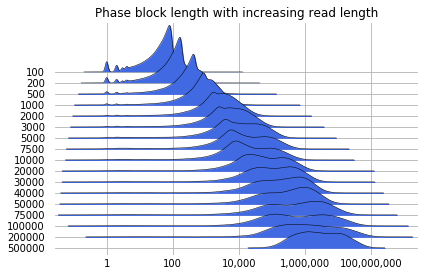

In [18]:
fig, ax = joypy.joyplot({k: np.log10(res[k]) for k in order if k in chosen_sets},
                    colormap=matplotlib.colors.ListedColormap(["royalblue"] * 18, name='from_list', N=None),
                    title="Phase block length with increasing read length",
                    grid='both',
                    range_style='own',
                    linewidth=0.5)
xticks = [int(i.get_text()) for i in ax[-1].get_xticklabels()]
ax[-1].set_xticklabels(["{:,}".format(10**i) for i in xticks])
plt.savefig("ridge-plot-phase-blocks.png", dpi=500)